# I've chosen a data set, containng information about cars (price, make, model, year, engine vollume, etc.).
# My goal is to train a model to predict a car's price.

In [2]:
import sys
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read the data:

In [3]:
original_data = pd.read_csv('data.csv' , encoding='latin-1')
print(original_data.shape)
original_data.head()

(9576, 10)


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [4]:
original_data.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


## Plot the prices:

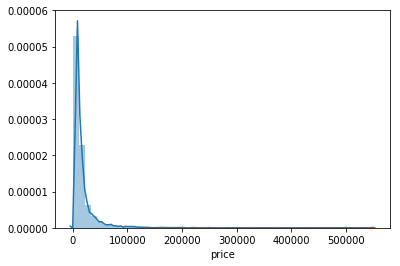

In [425]:
sns.distplot(original_data.price);

## Plot only the prices lower than 50 000, so we can see the distribution better:

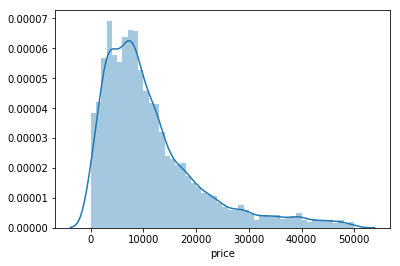

In [6]:
sns.distplot(original_data.price[original_data.price < 50000]);

In [8]:
data = original_data.copy()

## Remove rows where price=0

In [9]:
data = data[data.price != 0]

## Check data for nulls:

In [10]:
data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            425
engType           0
registration      0
year              0
model             0
drive           492
dtype: int64

## Remove all entries with no information about the engine vollume (engV)

In [11]:
data = data[original_data.engV.notnull()]
print(data.shape)
data.isnull().sum()

(8884, 10)


C:\Users\totok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


car               0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
year              0
model             0
drive           389
dtype: int64

## We see that there are some rows with null 'drive', so let's plot it:

Number of rows with null 'drive': 389


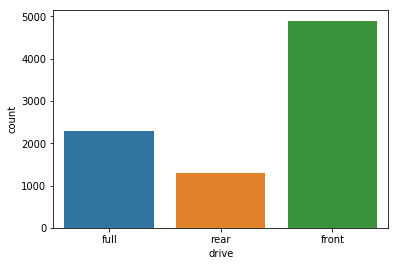

In [12]:
print("Number of rows with null 'drive': {}".format(data[data.drive.isnull()].shape[0]))
sns.countplot(data.drive);

## Since there are only 389 rows with null 'drive', I think we can just remove them:

In [13]:
data = data[data.drive.notnull()]
print(data.shape)
data.isnull().sum()

(8495, 10)


car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

## Done! There are no more nulls, so we can continue...
## Examine 'body' feature:

Cars where body=='other': 697


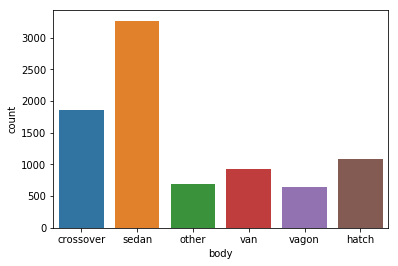

In [426]:
# crossover - SUV (kind of)
# vagon - combi
# hatch - hatchback (like the Golf)

print("Cars where body=='other': {}".format(data[data.body=='other'].shape[0]))

sns.countplot(data.body);

## 'drive' feature:

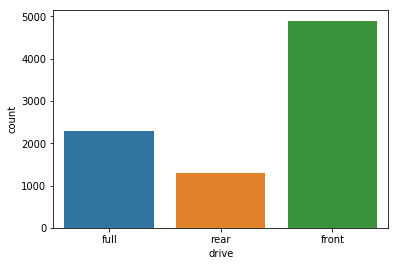

In [16]:
sns.countplot(data.drive);

## Drop the 'model' column:

In [17]:
data = data.drop('model', axis=1)

## Changing the column 'year' to 'yearsOld', hoping the model will deal better with it:

In [18]:
data['year'] = 2017 - data['year']
data.rename(columns={('year'): ('yearsOld')}, inplace=True)

### Later, it turns out that it doesn't matter

In [250]:
data.head()

,car,price,body,mileage,engV,engType,registration,yearsOld,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,7,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,6,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,9,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,5,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,4,full


In [248]:
data.describe()

,price,mileage,engV,yearsOld
count,8495.000000,8495.000000,8495.000000,8495.000000
mean,16185.453305,141.744202,2.568337,10.499117
std,24449.641512,97.464062,5.387238,6.925907
min,259.350000,0.000000,0.100000,1.000000
25%,5490.000000,74.000000,1.600000,6.000000
50%,9500.000000,130.000000,2.000000,9.000000
75%,17145.600000,197.000000,2.500000,13.000000
max,547800.000000,999.000000,99.990000,58.000000


## One-hot endocing:

In [215]:
encoded_data = data.copy()

oneHot_body = pd.get_dummies(encoded_data['body'])
oneHot_body.rename(columns={('other'): ('other_body')}, inplace=True)

oneHot_drive = pd.get_dummies(encoded_data['drive'])

oneHot_engType = pd.get_dummies(encoded_data['engType'])
oneHot_engType.rename(columns={('Other'): ('other_engType')}, inplace=True)

oneHot_reg = pd.get_dummies(encoded_data['registration']).drop('no', axis=1)
oneHot_reg.rename(columns={('yes'): ('isRegistered')}, inplace=True)

oneHot_car = pd.get_dummies(encoded_data['car'])


encoded_data = encoded_data.join(oneHot_body)
encoded_data = encoded_data.join(oneHot_drive)
encoded_data = encoded_data.join(oneHot_reg)
encoded_data = encoded_data.join(oneHot_engType)

# Don't use the 'car' column for now.
#encoded_data = encoded_data.join(oneHot_car)

encoded_data = encoded_data.drop(['car', 'body', 'registration', 'drive', 'engType'], axis=1)

encoded_data.head()

,price,mileage,engV,yearsOld,crossover,hatch,other_body,sedan,vagon,van,front,full,rear,isRegistered,Diesel,Gas,other_engType,Petrol
0,15500.0,68,2.5,7,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1,20500.0,173,1.8,6,0,0,0,1,0,0,0,0,1,1,0,1,0,0
2,35000.0,135,5.5,9,0,0,1,0,0,0,0,0,1,1,0,0,0,1
3,17800.0,162,1.8,5,0,0,0,0,0,1,1,0,0,1,1,0,0,0
5,16600.0,83,2.0,4,1,0,0,0,0,0,0,1,0,1,0,0,0,1


### Define the regression function:

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def do_linear_regression(X, y, return_train_test=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print("train: {}".format(regressor.score(X_train, y_train)))
    print("test: {}".format(regressor.score(X_test, y_test)))
    if (return_train_test) :
        return regressor, X_train, X_test, y_train, y_test
    else:
        return regressor

train: 0.3188875567889221
test: 0.3757017196272485


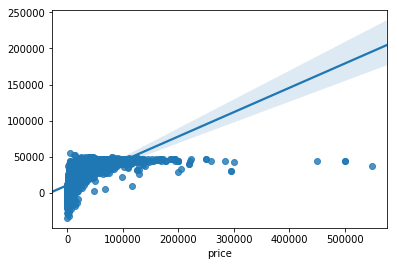

In [326]:
X = encoded_data.drop('price', axis=1)
y = encoded_data['price']
regressor = do_linear_regression(X, y)
sns.regplot(y, regressor.predict(X))

## This model doesn't predict prices over 50 000 :(

In [327]:
# Let's see the coeficients:
pd.DataFrame([regressor.coef_], columns=X.columns)

,mileage,engV,yearsOld,crossover,hatch,other_body,sedan,vagon,van,front,full,rear,isRegistered,Diesel,Gas,other_engType,Petrol
0,-38.67719,219.328824,-981.843671,-809.109205,-1249.729024,2841.940695,1840.970493,-1331.410203,-1292.662757,-10753.554181,10451.320661,302.23352,4523.060561,3347.552732,-3498.73587,85.259686,65.923452


## Try training without the 'front', 'rear', 'full' and 'isRegistered' columns, since they seem not so important:

train: 0.2552678046879696
test: 0.29152656053627246


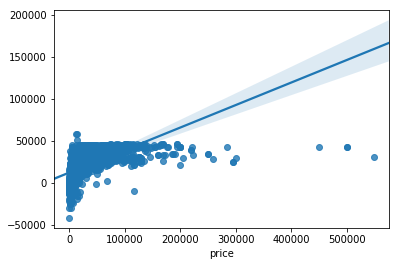

In [330]:
X_new = X.drop(['front','full','rear','isRegistered'], axis=1)
regr_new = do_linear_regression(X_new, y)
sns.regplot(y, regr_new.predict(X_new))

### Bad idea.

## Try adding the 'car' column (which is already one-hot encoded):

train: 0.5170994307317245
test: 0.5577323043633324


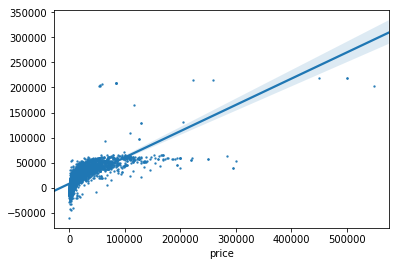

In [334]:
X_with_car = X.join(oneHot_car)
regr = do_linear_regression(X_with_car, y)
sns.regplot(y, regr.predict(X_with_car), scatter_kws={'s':2})

## Let's try to predict prices up to 100,000.

train: 0.6502249814991781
test: 0.6355240916283089


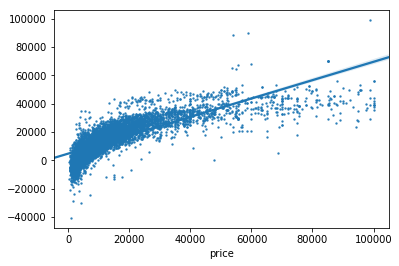

In [323]:
limited_data = encoded_data.join(oneHot_car)
limited_data = limited_data[limited_data['price'] <= 100000]
X_lim = limited_data.drop('price', axis=1)
y_lim = limited_data['price']

regr_lim = do_linear_regression(X_lim, y_lim)
sns.regplot(y_lim, regr_lim.predict(X_lim), scatter_kws={'s':2})

### It gets just a bit better

## Let's try to train a different model with just a few features:

train: 0.4717702531070096
test: 0.506402629269332


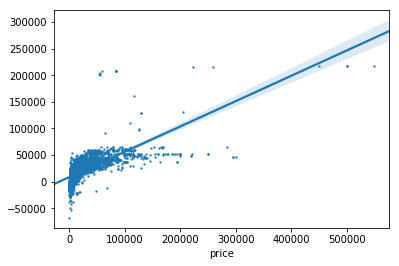

In [389]:
X_few_feat = encoded_data[['mileage', 'engV', 'yearsOld']].join(oneHot_car)
regr_few_feat = do_linear_regression(X_few_feat, y)
sns.regplot(y, regr_few_feat.predict(X_few_feat), scatter_kws={'s':2})

## Same sh?t

In [356]:
predictions = regr.predict(X_with_car)
predictions[predictions < 0].shape

(1011,)

### There are 1000 cars with negative prices, not good

# Conclusion:

## Best results:

### train: 0.6502249814991781
### test: 0.6355240916283089


